In [1]:
import gzip
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Read Train and Test Images

In [2]:
def read_image(file):
    # open label file to read in binary mode.  
    f = gzip.open(file,'rb')

    # first 4 byte magic number, which is not needed
    f.read(4)

    # next 16 bytes are int32 to be read as as big endian, 
    # intel processor reads as little endian hence needs to specify byte order explicitly
    dt = np.dtype(int)
    dt = dt.newbyteorder('>')

    # 2nd, 3rd and 4th 4 bytes are number of items, rows and cols
    item_count, row, col = np.frombuffer(f.read(12), dtype = dt).astype(np.int64)

    # next every byte is interger that contains image pixel value. 
    data = np.frombuffer(f.read(), dtype=np.uint8).astype(np.float32)
    # data as row*col array of all the images.
    data = data.reshape(item_count, row, col)
    
    # return  
    return (item_count, row, col,data)

Train_count, Train_row, Train_col, Train_img = read_image('data/train-images-idx3-ubyte.gz')
Test_count, Test_row, Test_col, Test_img = read_image('data/t10k-images-idx3-ubyte.gz')

# Read Train and Test Labels

In [3]:
def read_labels(file):
    # open label file to read in binary mode. 
    f = gzip.open(file,'rb') 
    
    # first 4 byte magic number, which is not needed
    f.read(4) 

    # 2nd 4 bytes are int32 to be read as as big endian, 
    # intel reads as little endian hence needs to specify byte order explicitly
    dt = np.dtype(int)
    dt = dt.newbyteorder('>')

    # second 4 bytes number of items
    item_count = np.frombuffer(f.read(4), dtype = dt).astype(np.int64) 
    
    # next every byte is interger that contains labels. 
    labels = np.frombuffer(f.read(), dtype = np.uint8).astype(np.int64)
    
    return (item_count, labels)

train_label_count, train_labels = read_labels('data/train-labels-idx1-ubyte.gz')
test_label_count, test_labels = read_labels('data/t10k-labels-idx1-ubyte.gz')

### Check Train Image and Train Label to make sure we read the data correctly

5


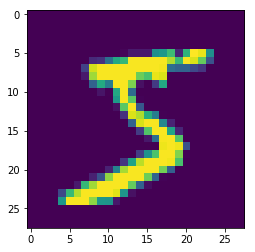

In [4]:
print(train_labels[0])
plt.imshow(Train_img[0]);

### Check test Image and Test Label to make sure we read the data correctly

7


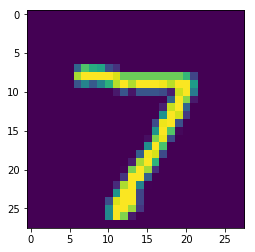

In [5]:
print(test_labels[0])
plt.imshow(Test_img[0]);

### Form X_train and y_train, X_test, y_test for modeling & testing

In [6]:
y_train = train_labels
X_train = Train_img.reshape(Train_count, Train_row*Train_col)

y_test = test_labels
X_test = Test_img.reshape(Test_count, Test_row*Test_col)

# Knn classifier with k = 3

In [7]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

## Check actual value, predicted value for a test image

(7, 7)

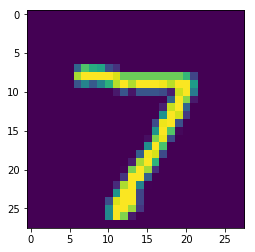

In [13]:
plt.imshow(X_test[0].reshape(Test_row, Test_col));
knn.predict(X_test[0].reshape(1,Test_row*Test_col))[0], y_test[0]

## Score the model against test data

In [10]:
knn.score(X_test, y_test) # took about 15 min to run

0.9705

## Finding few errors that machine made to understand the reason

In [26]:
error = []
for i in range(1000):
    if knn.predict(X_test[i].reshape(1,Test_row*Test_col))[0] != y_test[i]:
        error.append(i)
print(error)

[65, 115, 195, 241, 247, 300, 318, 320, 321, 341, 358, 381, 412, 445, 464, 479, 495, 542, 551, 582, 583, 591, 628, 659, 691, 707, 717, 740, 791, 839, 844, 881, 924, 938, 939, 947, 951, 957]


## Plotting them clearly shows the reason behind the error

9 4


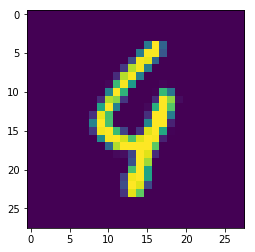

In [35]:
def error_check(ind):
    plt.imshow(X_test[ind].reshape(Test_row, Test_col));
    print(knn.predict(X_test[ind].reshape(1,Test_row*Test_col))[0], y_test[ind])
error_check(115)